# **Practica 1**

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [1]:
#Paqueterias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

## 1 Exercise : Generate distances
Do a code which calculate the comobile dsitance, the angular distance and the luminosity distance
for the following cosmology:

$\Omega_{m,0} = 0.3$\
$\Omega_{\Lambda , 0} = 0.7$

Do a plot with the 3 distances, expressed in Gpc/h up to a redshift of 3. In a future TD, we will compare the results you obtain with the ones obtained using CAMB or CLASS.

In [2]:
# Constantes
Omega_m0 = 0.3
Omega_r0 = 0
Omega_L0 = 1 - Omega_m0 - Omega_r0
Gpc = 0.001 #factor de conversión de Mpc a Gpc
c0 = 299792.458 #km/s 
c=1
H0 = 100/(c0*Gpc) #h/Gpc
z_min = 0
z_max = 10
z=np.arange(z_min,z_max,0.05)

La expresión estándar para el parámetro de Hubble es:

$$\frac{H^2(z)}{H_0^2} = \Omega_{r,0}(1 + z)^4 + \Omega_{m,0}(1 + z)^3 + \Omega_{k,0}(1 + z)^2 + \Omega_{\Lambda,0}$$

Las distancias mostradas en este trabajo son:

**1) Distancia comovil:**
$$\chi(z) = c\int_0^z\frac{dz'}{H(z')}$$

**2) Distancia lumínosa:**
$$d_L(z) = (1+z)(\chi(z))$$

**3) Distancia angular:**
$$d_A(z) = \frac{\chi(z)}{(1+z)}$$

In [3]:
# Prámetro de Hubble 
def H(z):
  return np.sqrt(Omega_r0*(z+1)**4 + Omega_m0*(z+1)**3 + Omega_L0)*H0
# Inverso de H(z)
def H1(z):
  return (H(z))**(-1)
# Distancia comovil 
def X(z):
  return c*quad(H1, 0, z)[0]
X = np.vectorize(X)
# Distancia lumínica 
def DL(z):
  return (z+1)*X(z)
# Distancia angular 
def DA(z):
  return X(z)/(1+z)

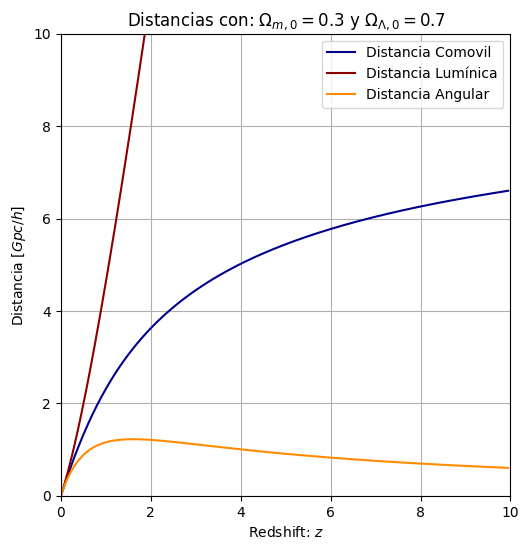

In [4]:
# #Graficas
fig, ax = plt.subplots(figsize=(5.8, 6))
ax.set_xlim(z_min, z_max)
ax.set_ylim(0, 10)
ax.plot(z,X(z), color='darkblue', label='Distancia Comovil')
ax.plot(z,DL(z), color='darkred', label='Distancia Lumínica')
ax.plot(z,DA(z), color='darkorange', label='Distancia Angular')
ax.legend(prop={'size': 10})
ax.set_xlabel('Redshift: $z$')
ax.set_ylabel('Distancia [$Gpc/h$]')
ax.set_title("Distancias con: $\\Omega_{m,0}=0.3$ y $\\Omega_{\\Lambda,0}=0.7$")
ax.grid(True)
plt.show()
ax.legend(fontsize=12)

## 2 Exercise : Density evolution
We consider a cosmological model in which:

$\Omega_{m,0} = 0.2999$\
$\Omega_{\Lambda , 0} = 0.7$\
$\Omega_{r,0} = 0.0001$

Make a plot with the evolution of $\rho_{m}$ with the time for redshift from $z = 0$ to $z = 10000$. In order to do it, we propose to follow this path:

In [5]:
# Constantes
Omega_m0 = 0.2999
Omega_r0 = 0.0001
Omega_L0 = 1 - Omega_m0 - Omega_r0
G = (4.3e-3)*(1e-9)/(1.025e17**2)*(1.668771e-95)/(c0**2) #1/Gpc #cte de gravitación
H0 = 100/(c0*Gpc*1.025e17) #(h/s)/Gpc
z_min = 0
z_max = 10000
z = np.arange(z_min,z_max,0.05)
a = 1/(1 + z)

In [6]:
# Funciones (de z)
# Parámetro de Hubble
def H(z):
  return np.sqrt(Omega_r0*(z+1)**4 + Omega_m0*(z+1)**3  + Omega_L0)*H0

# Densidades
# Densidad critica
def rho_crit(z):
  return (3*H(z)**2)/(8*np.pi*G)
def rho0(Omega0):
  return rho_crit(0)*Omega0
# Materia
def rho_m(z):
  return rho0(Omega_m0)*(1+z)**3
def Omega_m(z):
  return rho_m(z)/rho_crit(z)
# Radiación
def rho_r(z):
  return rho0(Omega_r0)*(1+z)**4
def Omega_r(z):
  return rho_r(z)/rho_crit(z)
# Energía oscura
def rho_L(z):
  return rho0(Omega_L0)
def Omega_L(z):
  return rho_L(z)/rho_crit(z)

Para comprobar que las ecuaciones anteriores son correctas, se grafica la evolución del universo.

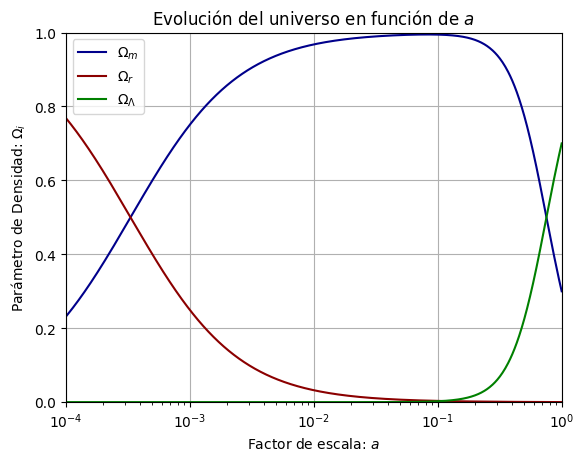

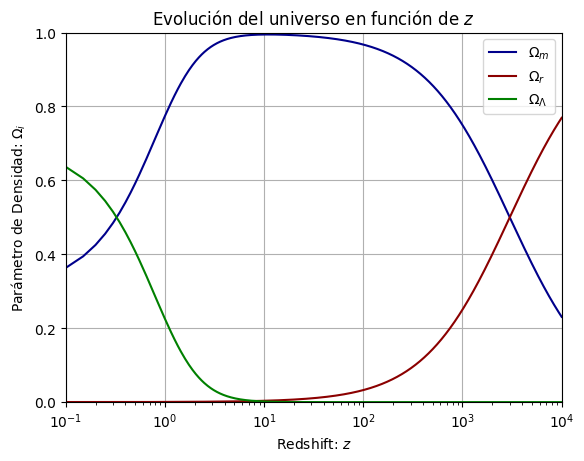

In [7]:
# Graficas
#en función de a
fig, ax = plt.subplots()
ax.set_xlim(1/(1+z_max), 1)
ax.set_ylim(0, 1)
ax.set_xscale('log')
ax.plot(a,Omega_m( 1/a - 1), color='darkblue', label='$\\Omega_{m}$')
ax.plot(a,Omega_r( 1/a - 1), color='darkred', label='$\\Omega_{r}$')
ax.plot(a,Omega_L( 1/a - 1), color='green', label='$\\Omega_{\\Lambda}$')
ax.legend(prop={'size': 10})
ax.set_xlabel('Factor de escala: $a$')
ax.set_ylabel('Parámetro de Densidad: $\\Omega_i$')
ax.set_title(f"Evolución del universo en función de $a$")
ax.grid(True)
plt.show()
#en función de z
fig, ax = plt.subplots()
ax.set_xlim(0.1, z_max)
ax.set_ylim(0, 1)
ax.set_xscale('log')
ax.plot(z,Omega_m(z), color='darkblue', label='$\\Omega_{m}$')
ax.plot(z,Omega_r(z), color='darkred', label='$\\Omega_{r}$')
ax.plot(z,Omega_L(z), color='green', label='$\\Omega_{\\Lambda}$')
ax.legend(prop={'size': 10})
ax.set_xlabel('Redshift: $z$')
ax.set_ylabel('Parámetro de Densidad: $\\Omega_i$')
ax.set_title(f"Evolución del universo en función de $z$")
ax.grid(True)
plt.show()

##### 1) Determine the redshift/scale factor of equivalence $z_{eq}^{\Lambda,m}/a_{eq}^{\Lambda,m}$ between $\Omega_{\Lambda}$ and $\Omega_{m}$

In [8]:
#se define una eq. |Om(z)- OL(z)|
def f1(z):
    return abs(Omega_L(z) - Omega_m(z))
#se resulve para z la eq. |Om(z)- OL(z)| = 0
zeros1 = fsolve(f1, 0.0)
z_eq1 = zeros1[0]
#cambio a scale factor
a_eq1 = 1/(1 + z_eq1)
print(f"La epoca de eq. entre materia y energía oscura ocurrió en: z = {z_eq1} y a = {a_eq1}")

La epoca de eq. entre materia y energía oscura ocurrió en: z = 0.3264998078792464 y a = 0.7538636598815338


##### 2) Determine the redshift/scale factor of equivalence $z_{eq}^{r,m}/a_{eq}^{r,m}$ between $\Omega_{r}$ and $\Omega_{m}$

In [9]:
#se define una eq. |Om(z)- Or(z)|
def f1(z):
    return abs(Omega_m(z) - Omega_r(z))
#se resulve para z la eq. |Om(z)- Or(z)| = 0
zeros2 = fsolve(f1, 3000)
z_eq2 = zeros2[0]
#cambio a scale factor
a_eq2 = 1/(1+z_eq2)
print(f"La epoca de eq. entre materia y radiación ocurrió en: z = {z_eq2} y a = {a_eq2}")

La epoca de eq. entre materia y radiación ocurrió en: z = 2998.0 y a = 0.00033344448149383126


##### 3) Determine the evolution of $a(t)$ for the era of domination of the 3 components

In [10]:
# a(t) para las 3 eras (para obtener t_0 se resuelve H(a) para cada componente dominante)
# Radiation
t0_r = 2*H0*np.sqrt(Omega_r0)
def a_r(t):
    return (t*t0_r)**0.5
# Matter
t0_m = (3*H0*np.sqrt(Omega_m0))/2
def a_m(t):
    return (t*t0_m)**(2/3)
# Dark energy
t0_L = H0*np.sqrt(Omega_L0)
def a_L(t):
    return np.exp(t*t0_L)

##### 4) Determine the evolution of $\rho_m(t)$ for the era of domination of the 3 components

In [11]:
# rho_m(t) para las 3 eras
# Radiation
def rhom_r(t):
  return rho0(Omega_m0)*a_r(t)**(-3)
# Matter
def rhom_m(t):
  return rho0(Omega_m0)*a_m(t)**(-3)
# Dark energy
def rhom_L(t):
  return rho0(Omega_m0)*a_L(t)**(-3)

##### 5) Convert the $a_{eq}$ in the corresponding lookback-time

In [12]:
#se define la integral para calcular el lookback-time
def int_lookback(z):
    return 1/(H(z)*(1+z))
#se integra la función anterior para las dos epocas de equivalencia
# Materia/DE
t_eq1, err = quad(int_lookback, 0, z_eq1)
# Materia/Radiación
t_eq2, err = quad(int_lookback, 0, z_eq2)
print(f'El tiempo de eq. materia/energía oscura fue en t = {t_eq1} s/h y para la eq. materia/radiacón en t = {t_eq2} s/h')

El tiempo de eq. materia/energía oscura fue en t = 8.047705428490925e+16 s/h y para la eq. materia/radiacón en t = 2.961457128146136e+17 s/h


##### 6) Plot the evolution of $\rho_m(t)$ with the time in log-log scale for the period corresponding to $z = 0$ up to $z = 10000$ considering the different eras

In [13]:
# Tiempos
# Tiempo cuando z = 10000
t_10000, err = quad(int_lookback, 0, z_max)
# Tiempo cuando z = 0
t_0, err = quad(int_lookback, 0, z_min)
# Edad del universo
t_H = 1/H0

# Arrays de t
# Desde z_0 hasta z_eq1
time1 = np.linspace(t_0,t_eq1,10000,endpoint= True)
# Desde z_eq1 hasta z_eq2
time2 = np.linspace(t_eq1,t_eq2,10000,endpoint= True)
# Desde z_eq2 hasta z_10000
time3 = np.linspace(t_eq2,t_H,10000,endpoint= True)
# Desde z_0 hasta z_10000
time = np.linspace(t_0,t_10000,10000,endpoint= True)

In [14]:
# Reescalando las densidades para las epocas de equivalencia 
def rhom_m2(t):
  return rhom_m(t)*(rhom_L(t_eq1)/rhom_m(t_eq1))
def rhom_r2(t):
  return rhom_r(t)*(rhom_m2(t_eq2)/rhom_r(t_eq2))

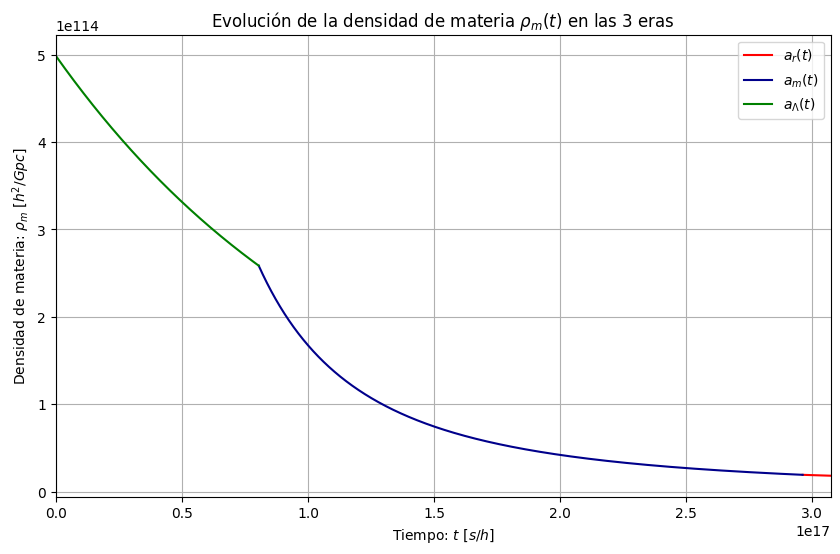

In [15]:
# Graficas
# rho_m(t)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(t_0,t_H)
ax.plot(time3,rhom_r2(time3), color='red', label='$a_r(t)$')
ax.plot(time2,rhom_m2(time2), color='darkblue', label='$a_m(t)$')
ax.plot(time1,rhom_L(time1), color='green', label='$a_{\\Lambda}(t)$')
ax.grid(True)
ax.legend(prop={'size': 10})
ax.set_xlabel('Tiempo: $t$ [$s/h$]')
ax.set_ylabel('Densidad de materia: $\\rho_m$ [$h^2/Gpc$]')
ax.set_title(f"Evolución de la densidad de materia $\\rho_m(t)$ en las 3 eras")
plt.show()